In [1]:
import warnings
from sklearn.model_selection import GridSearchCV, train_test_split
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data= pd.read_csv('../logis_norm.csv')

### split data en X et Y

In [4]:
data1= data.copy()
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

In [7]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 123, stratify=Y)


In [8]:
np.unique(Y_train, return_counts=True)

(array([0, 1], dtype=uint8), array([41020, 41021], dtype=int64))

### ---KNN---

In [33]:
knn = KNeighborsClassifier()
params={'n_neighbors' : [2, 3, 4, 5, 6, 7, 8],
        'metric': ['minkowski','euclidean','manhattan']}

##accuracy
grid_search_acc= GridSearchCV(estimator=knn, param_grid= params, scoring='accuracy',cv=5, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train)
y_predict= grid_search_acc.best_estimator_.predict(X_test)

In [60]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")


----------
best parameters:  {'metric': 'manhattan', 'n_neighbors': 3}
----------
[[10023   233]
 [ 3957  6298]]
----------
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     10256
           1       0.96      0.61      0.75     10255

    accuracy                           0.80     20511
   macro avg       0.84      0.80      0.79     20511
weighted avg       0.84      0.80      0.79     20511

----------


In [75]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=knn, param_grid= params, scoring=rec_avg,cv=5, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train)
y_predict= grid_search_rec.best_estimator_.predict(X_test)

In [88]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'metric': 'manhattan', 'n_neighbors': 3}
----------
[[10023   233]
 [ 3957  6298]]
----------
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     10256
           1       0.96      0.61      0.75     10255

    accuracy                           0.80     20511
   macro avg       0.84      0.80      0.79     20511
weighted avg       0.84      0.80      0.79     20511

----------


In [83]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=knn, param_grid= params, scoring=prec_avg,cv=5, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train)
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

In [84]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'metric': 'minkowski', 'n_neighbors': 2}
----------
[[10023   233]
 [ 3957  6298]]
----------
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     10256
           1       0.96      0.61      0.75     10255

    accuracy                           0.80     20511
   macro avg       0.84      0.80      0.79     20511
weighted avg       0.84      0.80      0.79     20511

----------


In [89]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.set_ylim([0.74,0.83])
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

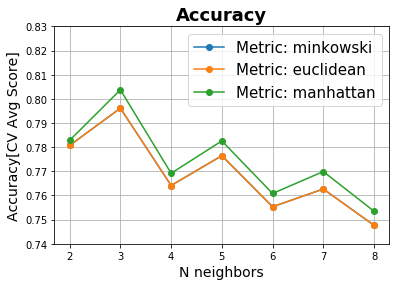

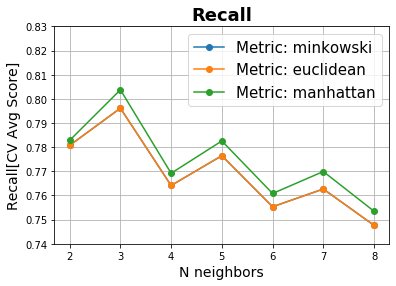

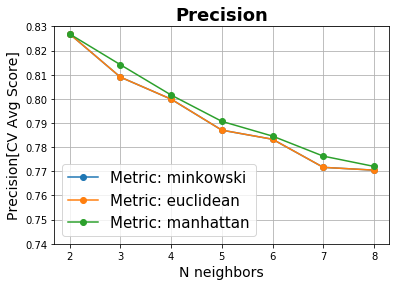

In [90]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Precision')


In [87]:
from pprint import pprint
pprint(grid_search_acc.cv_results_['mean_test_score'])
pprint(grid_search_rec.cv_results_['mean_test_score'])
pprint(grid_search_prec_avg.cv_results_['mean_test_score'])

array([0.7807194 , 0.79612633, 0.76413013, 0.77646543, 0.75532965,
       0.76267964, 0.74765056, 0.7807194 , 0.79612633, 0.76413013,
       0.77646543, 0.75532965, 0.76267964, 0.74765056, 0.78281591,
       0.80374447, 0.76918858, 0.78257213, 0.7608269 , 0.76991992,
       0.75347692])
array([0.78072166, 0.79612756, 0.76413221, 0.77646658, 0.75533155,
       0.7626807 , 0.74765229, 0.78072166, 0.79612756, 0.76413221,
       0.77646658, 0.75533155, 0.7626807 , 0.74765229, 0.78281814,
       0.80374559, 0.76919056, 0.78257311, 0.76082864, 0.76992081,
       0.75347846])
array([0.82686311, 0.80899179, 0.79986555, 0.78703629, 0.78326913,
       0.77164554, 0.77048243, 0.82686311, 0.80899179, 0.79986555,
       0.78703629, 0.78326913, 0.77164554, 0.77048243, 0.8268366 ,
       0.81412186, 0.80157775, 0.79067894, 0.78456911, 0.77628384,
       0.77203246])
